In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from IPython.core.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
#Data Collection
dataset = pd.read_csv('Boston.csv')

In [3]:
#Statistical Analysis
dataset.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
dataset.isnull().any()

Unnamed: 0    False
crim          False
zn            False
indus         False
chas          False
nox           False
rm            False
age           False
dis           False
rad           False
tax           False
ptratio       False
black         False
lstat         False
medv          False
dtype: bool

In [5]:
Datacolumns = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat'
]

In [7]:
X = dataset[Datacolumns].values
Y = dataset['medv'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
X = dataset.values
coeff_df = pd.DataFrame(regressor.coef_, Datacolumns, columns=['Coefficient'])
display(coeff_df)

,Coefficient
crim,-0.120378
zn,0.042998
indus,-0.003139
chas,3.134587
nox,-19.298156
rm,3.125153
age,0.013029
dis,-1.450825
rad,0.302562
tax,-0.009820


In [10]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataDisplay = df.head(20)
display(dataDisplay)

,Actual,Predicted
0,15.1,17.862869
1,8.8,5.188124
2,15.6,12.143645
3,33.8,34.531506
4,21.1,22.103598
5,20.0,23.265655
6,13.8,17.293259
7,42.8,28.474578
8,15.4,18.040466
9,10.9,18.353220


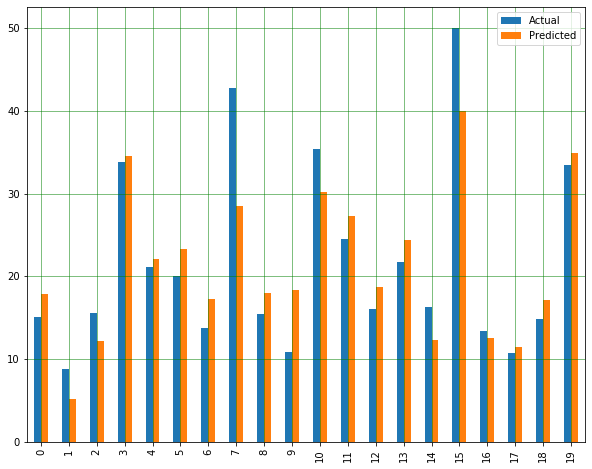

In [11]:
dataDisplay.plot(kind='bar', figsize=(10, 8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.2017817549762984
Mean Squared Error: 18.632641121699216
Root Mean Squared Error: 4.316554311218523
